#📌 Extracão

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [4]:
df = pd.read_json(url)

In [5]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [6]:
#Transformando os dicionarios em colunas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_final = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [7]:
df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [8]:
#As 5 primeiras linhas
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
#As 5 ultimas linhas
df_final.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [10]:
#informações gerais das colunas
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
#Subistituir valores de SeniorCitizen para Yes e No
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(object)
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].replace(0,'No')
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].replace(1,'Yes')
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,No,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
#Subistituir os valores nulos de Charges.Total ´por 0 e converter os tipos para float
df_final['Charges.Total'] = df_final['Charges.Total'].replace([' ', '', 'N/A', 'na', 'null'], pd.NA)
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)
df_final['Charges.Total'] = df_final['Charges.Total'].astype(float)

In [13]:
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [14]:
#Trasformando os valores '' e ' ' em nulos
df_final = df_final.replace(['', ' ', 'N/A', 'na', 'null'], pd.NA)

In [15]:
#ver nulos em todas as colunas do df
df_final.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [16]:
#Apagar os valores nulos da coluna "Churn"

df_final = df_final[df_final['Churn'].isin(['Yes', 'No'])]
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,No,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [17]:
#valores duplicados
df_final.duplicated().sum()

np.int64(0)

In [18]:
df_final.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Columns: 21 entries, customerID to Charges.Total
dtypes: float64(2), int64(1), object(18)
memory usage: 1.2+ MB


In [19]:
#Criação da Coluna Contas_Diarias
df_final['dias_contrato'] = df_final['tenure']*30
df_final['Contas_Diarias'] = df_final['Charges.Total']/df_final['dias_contrato']
df_final['Contas_Diarias']

,Contas_Diarias
0,2.197407
1,2.008889
2,2.340417
3,3.173974
4,2.971111
...,...
7262,1.904872
7263,2.838939
7264,1.545833
7265,2.302313


In [20]:
#Apagando a coluna dia_contrato
df_final = df_final.drop('dias_contrato', axis=1)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


In [21]:
#Tradução dos termos da coluna
termos = ['Id_cliente', 'churn', 'genero', 'idoso', 'possui_parceiro','possui_dependentes','tempo_de_contato', 'servico_telefonico',
          'varias_linhas_telefonicas', 'tipo_de_internet', 'seguraca_online', 'backup_online',
          'protecao_de_dispositivo','suporte_tecnico','tv_por_streaming','filmes_por_streaming','tipo_de_contrato','fatura_digital',
          'forma_de_pagamento','gasto_mensal','gasto_total','contas_diarias']

df_final.columns = termos


In [22]:
df_final.head()

,Id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_de_contato,servico_telefonico,varias_linhas_telefonicas,tipo_de_internet,...,protecao_de_dispositivo,suporte_tecnico,tv_por_streaming,filmes_por_streaming,tipo_de_contrato,fatura_digital,forma_de_pagamento,gasto_mensal,gasto_total,contas_diarias
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


In [23]:
#Subistituir valores de genero para Masculino e Feminino
df_final['genero'] = df_final['genero'].replace('Female','Feminino')
df_final['genero'] = df_final['genero'].replace('Male','Masculino')

In [24]:
#Tradução dos tipo_de_contrato
df_final['tipo_de_contrato'] = df_final['tipo_de_contrato'].replace('One year','Um ano')
df_final['tipo_de_contrato'] = df_final['tipo_de_contrato'].replace('Month-to-month','Mês a mês')
df_final['tipo_de_contrato'] = df_final['tipo_de_contrato'].replace('Two year', 'Dois anos')

In [25]:
#Tradução dos tipo_de_internet
df_final['tipo_de_internet'] =  df_final['tipo_de_internet'].replace('Fiber optic','Fibra óptica')

In [26]:
#Tradução das formas de pagamentos
df_final['forma_de_pagamento'] =  df_final['forma_de_pagamento'].replace('Electronic check','Cheque eletrônico')
df_final['forma_de_pagamento'] =  df_final['forma_de_pagamento'].replace('Mailed check','Cheque enviado')
df_final['forma_de_pagamento'] =  df_final['forma_de_pagamento'].replace('Bank transfer (automatic)','Transferência bancária (automática)')
df_final['forma_de_pagamento'] =  df_final['forma_de_pagamento'].replace('Credit card (automatic)','Cartão de crédito (automático)')

#📊 Carga e análise

In [27]:
analise_descritiva = df_final.describe()
analise_descritiva


,tempo_de_contato,gasto_mensal,gasto_total,contas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2279.734304,2.159981
std,24.559481,30.090047,2266.794470,1.006196
min,0.000000,18.250000,0.000000,0.459167
25%,9.000000,35.500000,398.550000,1.205996
50%,29.000000,70.350000,1394.550000,2.345775
75%,55.000000,89.850000,3786.600000,3.005985
max,72.000000,118.750000,8684.800000,4.046667


In [28]:
#Tradução dos termos do index
termos2 = ['Contagem (count)','Média (mean)','Desvio padrão (std)','Mínimo (min)','1º quartil (25%)','Mediana (50%)','3º quartil (75%)','Máximo (max)']

analise_descritiva.index = termos2
analise_descritiva

,tempo_de_contato,gasto_mensal,gasto_total,contas_diarias
Contagem (count),7043.000000,7043.000000,7043.000000,7032.000000
Média (mean),32.371149,64.761692,2279.734304,2.159981
Desvio padrão (std),24.559481,30.090047,2266.794470,1.006196
Mínimo (min),0.000000,18.250000,0.000000,0.459167
1º quartil (25%),9.000000,35.500000,398.550000,1.205996
Mediana (50%),29.000000,70.350000,1394.550000,2.345775
3º quartil (75%),55.000000,89.850000,3786.600000,3.005985
Máximo (max),72.000000,118.750000,8684.800000,4.046667


In [29]:
#import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

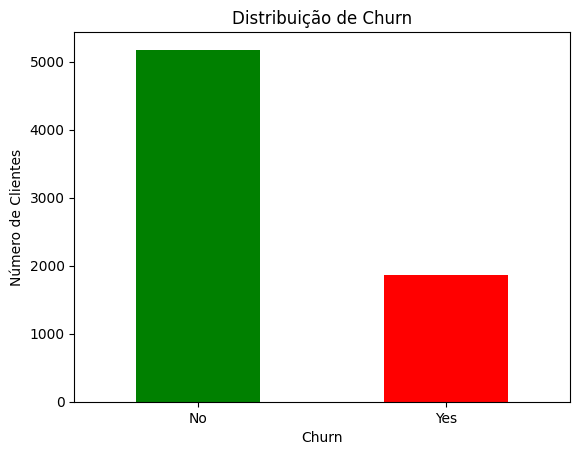

In [30]:
# Contagem absoluta de clientes que sairam e não sairam
df_final['churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

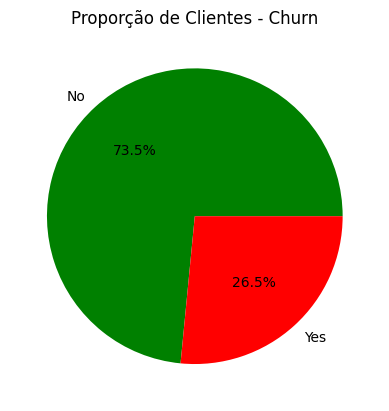

In [31]:
#Analise em %
df_final['churn'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proporção de Clientes - Churn')
plt.ylabel('')
plt.show()

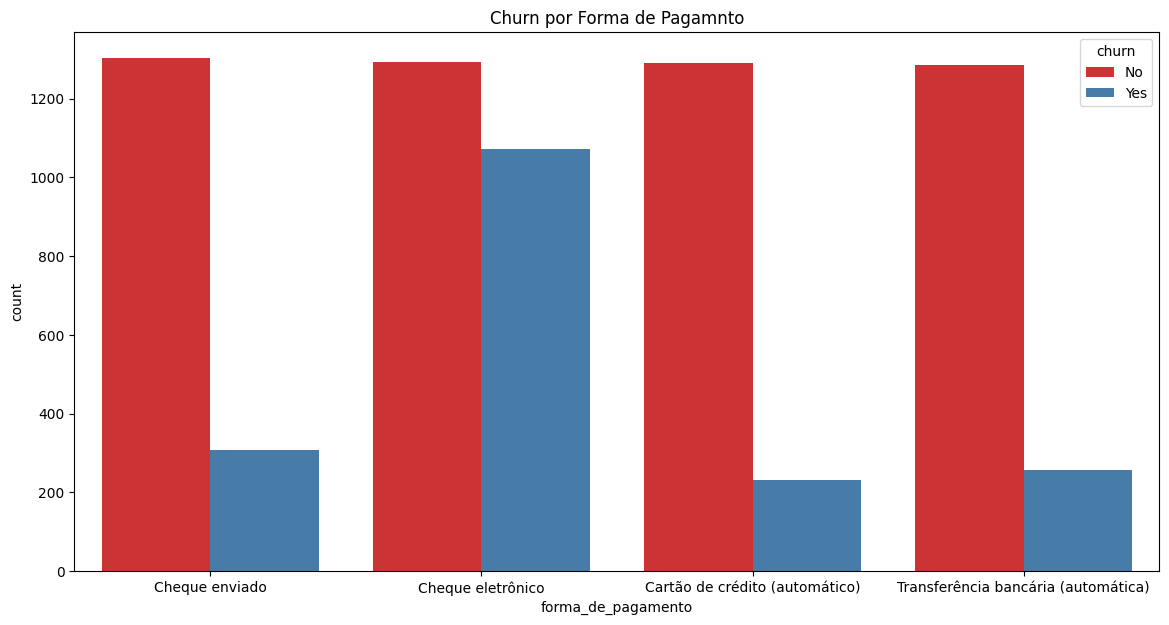

In [32]:
# Churn por metodo de Pagamento
plt.figure(figsize=(14, 7))
sns.countplot(x='forma_de_pagamento', hue='churn', data=df_final, palette='Set1')
plt.title('Churn por Forma de Pagamnto')
plt.show()

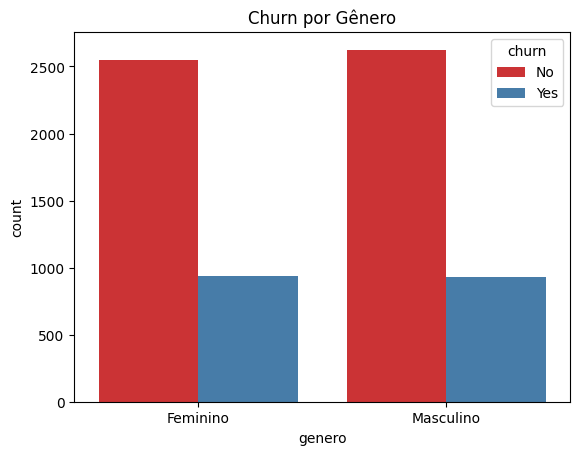

In [33]:
#Churn por Genero
sns.countplot(x='genero', hue='churn', data=df_final, palette='Set1')
plt.title('Churn por Gênero')
plt.show()

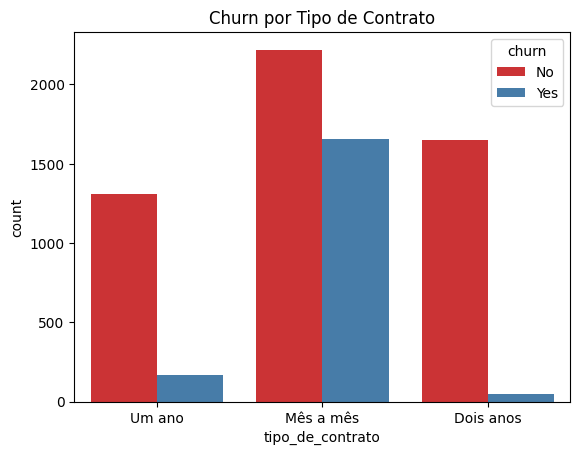

In [34]:
# Churn por Tipo de Contrato
sns.countplot(x='tipo_de_contrato', hue='churn', data=df_final, palette='Set1')
plt.title('Churn por Tipo de Contrato')
plt.show()

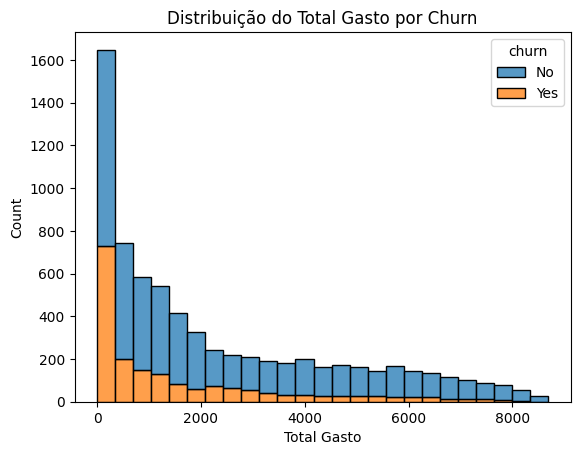

In [35]:
# Distribuição do Total Gasto por Churn
sns.histplot(data=df_final, x='gasto_total', hue='churn', multiple='stack', kde=False)
plt.title('Distribuição do Total Gasto por Churn')
plt.xlabel('Total Gasto')
plt.show()


In [36]:
df_final.describe()

,tempo_de_contato,gasto_mensal,gasto_total,contas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2279.734304,2.159981
std,24.559481,30.090047,2266.794470,1.006196
min,0.000000,18.250000,0.000000,0.459167
25%,9.000000,35.500000,398.550000,1.205996
50%,29.000000,70.350000,1394.550000,2.345775
75%,55.000000,89.850000,3786.600000,3.005985
max,72.000000,118.750000,8684.800000,4.046667


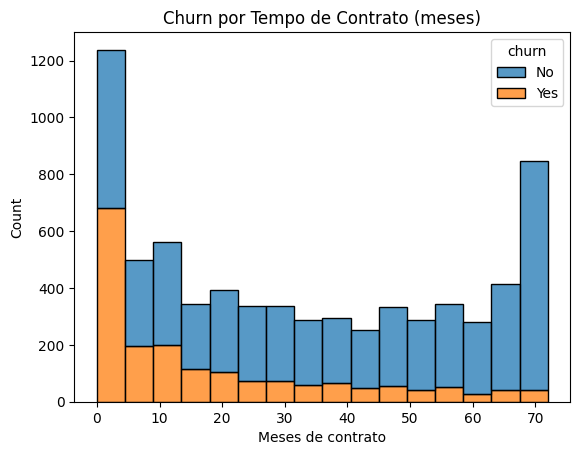

In [37]:
#Churn Por tempo de contato
sns.histplot(data=df_final, x='tempo_de_contato', hue='churn', multiple='stack', kde=False)
plt.title('Churn por Tempo de Contrato (meses)')
plt.xlabel('Meses de contrato')
plt.show()

/tmp/ipython-input-38-1109690634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='gasto_mensal', data=df_final, palette='coolwarm')


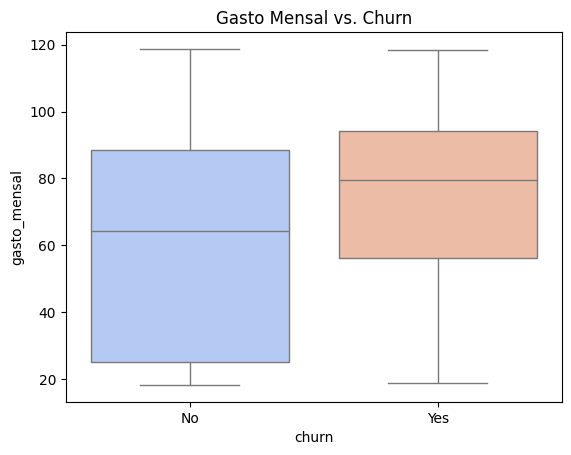

In [38]:
#Gasto Mensal vs Churn
sns.boxplot(x='churn', y='gasto_mensal', data=df_final, palette='coolwarm')
plt.title('Gasto Mensal vs. Churn')
plt.show()

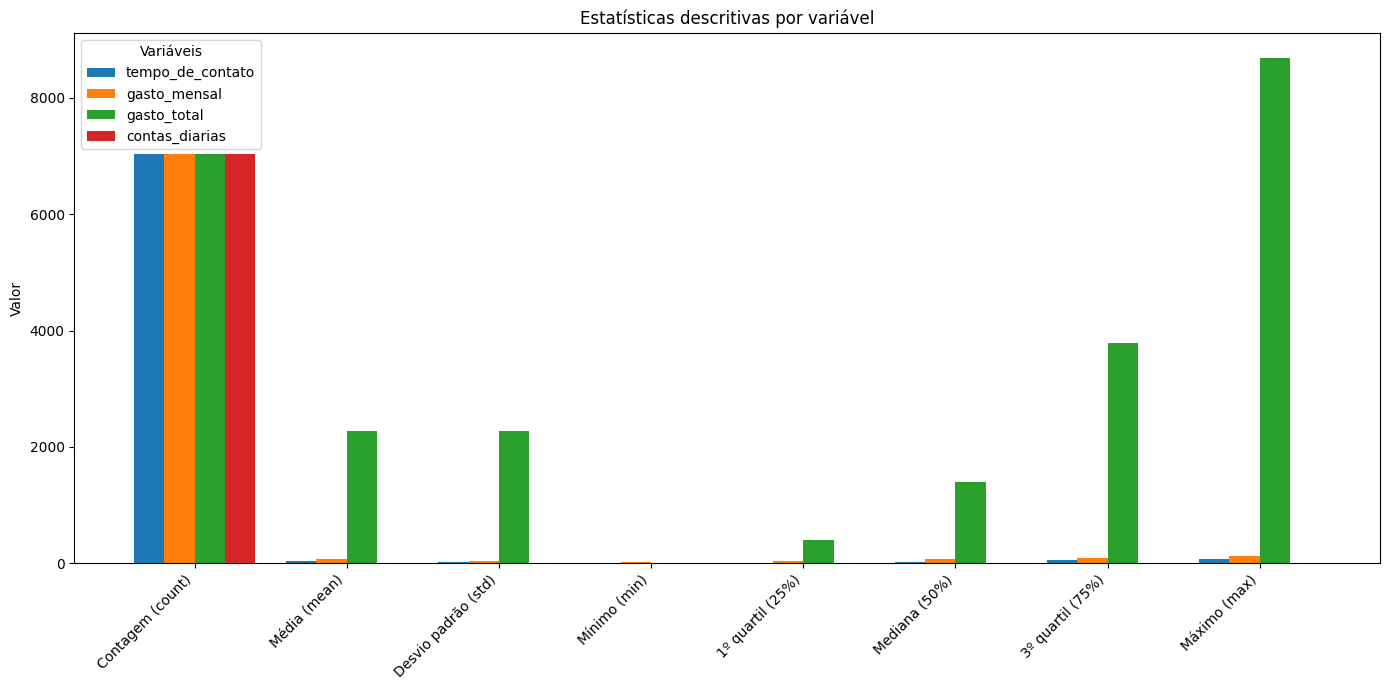

In [39]:
#Estatisticas descritivas
df_plot = analise_descritiva
largura = 0.2
x = range(len(df_plot.index))

fig, ax = plt.subplots(figsize=(14, 7))

for i, var in enumerate(df_plot.columns):
    pos = [p + largura*i for p in x]
    ax.bar(pos, df_plot[var], width=largura, label=var)

ax.set_xticks([p + largura*1.5 for p in x])
ax.set_xticklabels(df_plot.index, rotation=45, ha='right')

ax.set_ylabel('Valor')
ax.set_title('Estatísticas descritivas por variável')
ax.legend(title='Variáveis')

plt.tight_layout()
plt.show()

In [40]:
analise_descritiva

,tempo_de_contato,gasto_mensal,gasto_total,contas_diarias
Contagem (count),7043.000000,7043.000000,7043.000000,7032.000000
Média (mean),32.371149,64.761692,2279.734304,2.159981
Desvio padrão (std),24.559481,30.090047,2266.794470,1.006196
Mínimo (min),0.000000,18.250000,0.000000,0.459167
1º quartil (25%),9.000000,35.500000,398.550000,1.205996
Mediana (50%),29.000000,70.350000,1394.550000,2.345775
3º quartil (75%),55.000000,89.850000,3786.600000,3.005985
Máximo (max),72.000000,118.750000,8684.800000,4.046667


 # Análise de Correlação entre Variáveis

In [41]:
# Calculando a matriz de correlação
correlacao = df_final.corr(numeric_only=True)
correlacao


,tempo_de_contato,gasto_mensal,gasto_total,contas_diarias
tempo_de_contato,1.000000,0.247900,0.826178,0.246198
gasto_mensal,0.247900,1.000000,0.651174,0.996237
gasto_total,0.826178,0.651174,1.000000,0.650915
contas_diarias,0.246198,0.996237,0.650915,1.000000


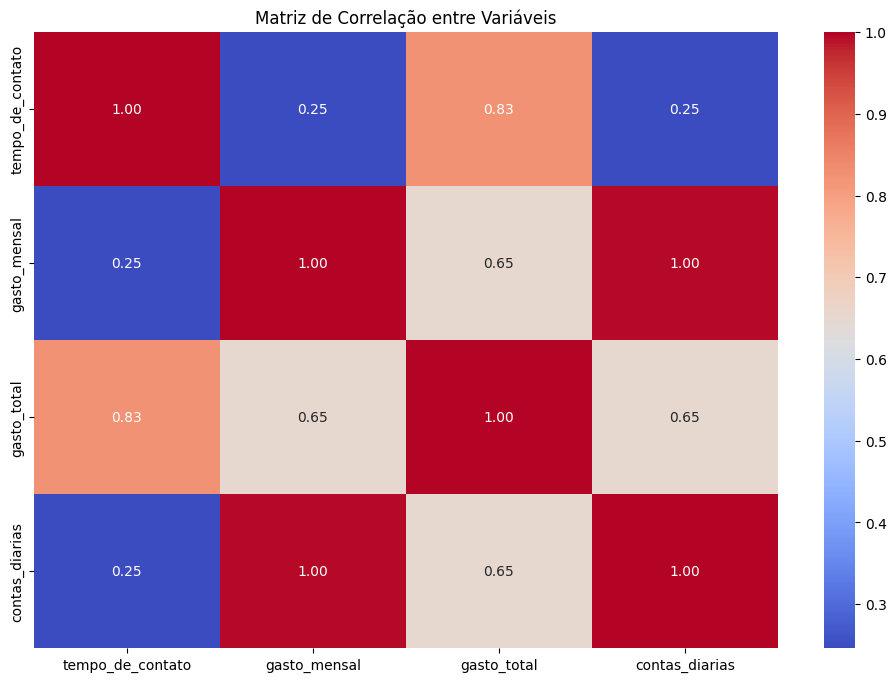

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


#📄Relatorio Final

##1. Introdução

A evasão de clientes, conhecida no meio empresarial como Churn, é um dos maiores desafios enfrentados por empresas que operam com base em contratos ou assinaturas. O Churn representa os clientes que decidem encerrar seu relacionamento com a empresa dentro de um determinado período.

O objetivo desta análise é compreender o perfil dos clientes que cancelam e os fatores que influenciam essa decisão, buscando identificar padrões de comportamento e características que diferenciam os clientes que permanecem dos que deixam a empresa. A partir dessa investigação, será possível gerar insights valiosos para criar estratégias de retenção mais eficazes, reduzir a taxa de evasão e aumentar o valor do ciclo de vida dos clientes.

O conhecimento obtido pode apoiar ações preventivas, como ofertas personalizadas, melhoria na experiência do cliente ou ajustes nos planos de serviço, visando antecipar a evasão e fidelizar os clientes com maior risco de cancelamento.



##2. Limpeza e Tratamento de Dados
Após a importação da base de dados, foram realizados os seguintes passos para garantir a qualidade e consistência das informações, assegurando que a análise fosse feita de forma confiável e precisa.

## Importação dos Dados
Os dados foram carregados em um DataFrame utilizando a biblioteca pandas, permitindo uma manipulação eficiente das tabelas.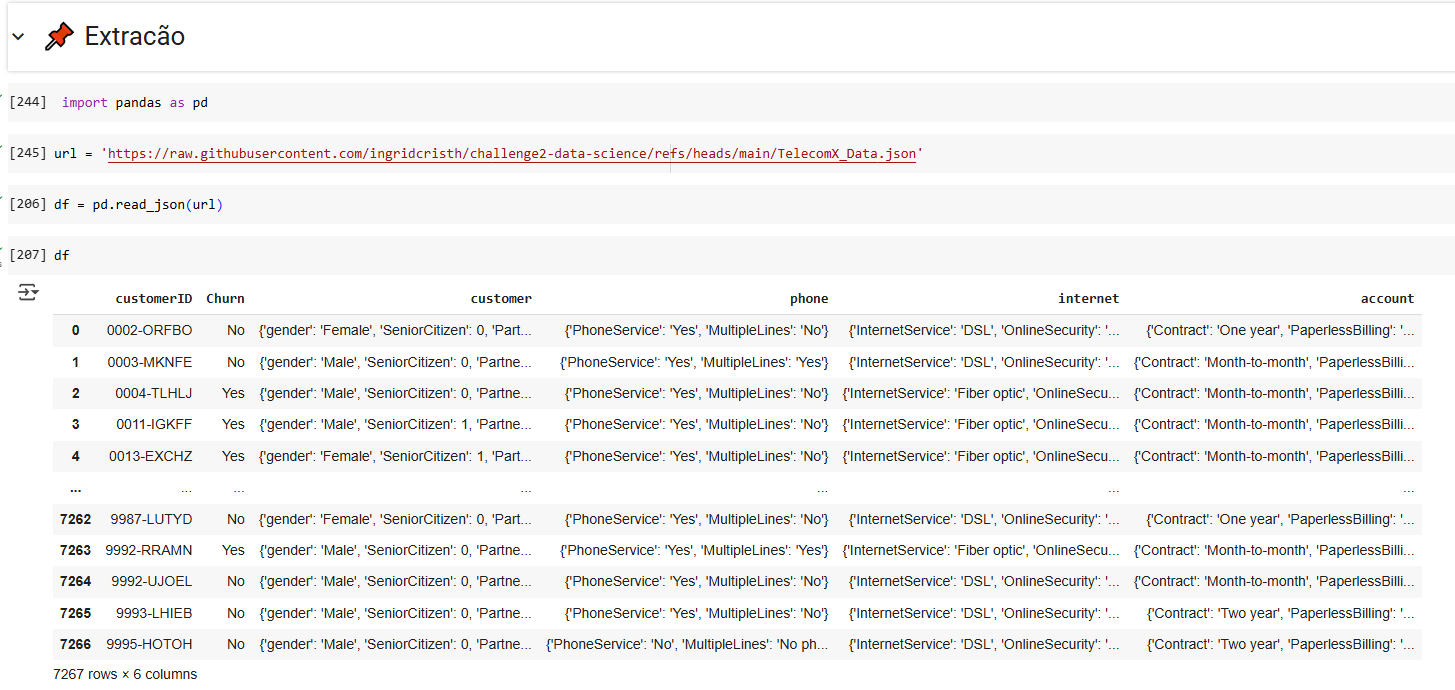

Os dicionarios do df Forma transformados em colunas: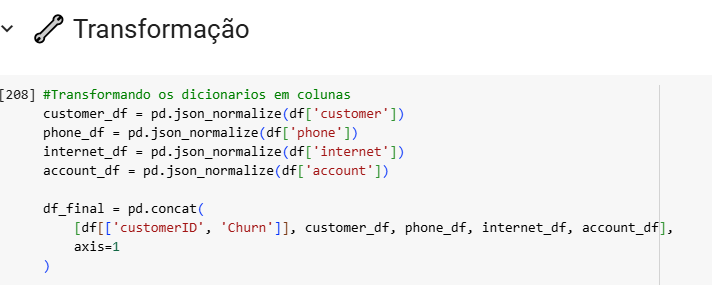


Depois forma feitas as seguintes transformações

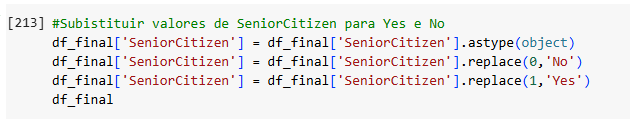

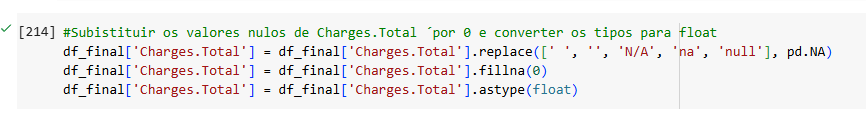

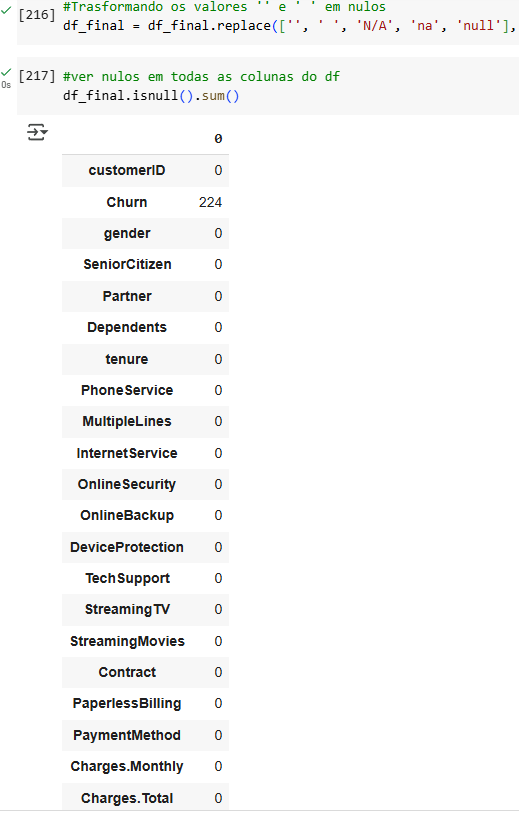

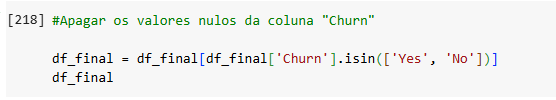

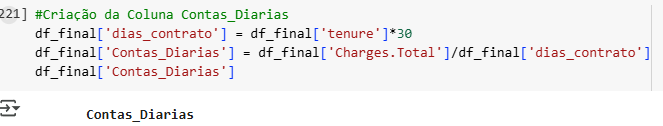

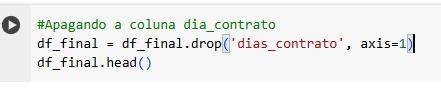

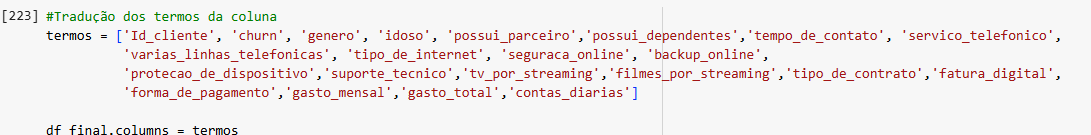

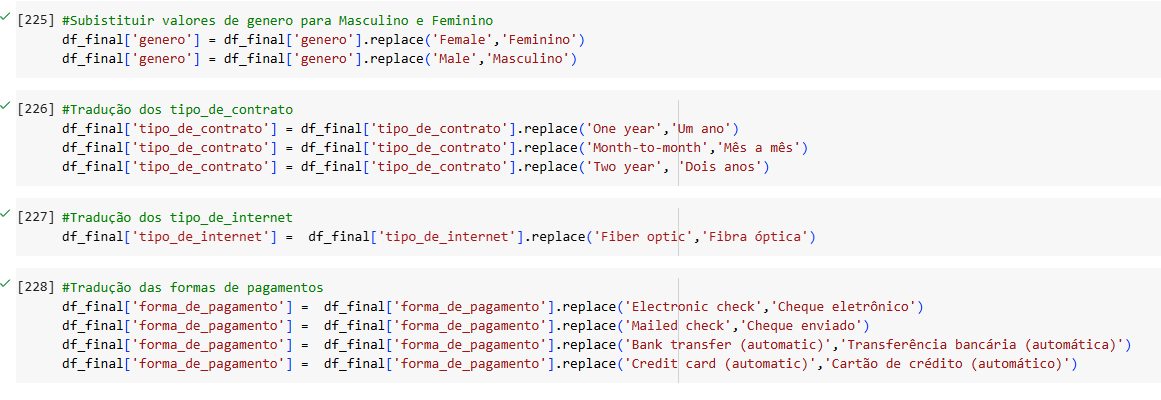

##3. Análise Exploratória de Dados:

Foram construidos as seguintes visualização:

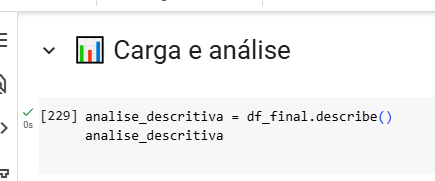

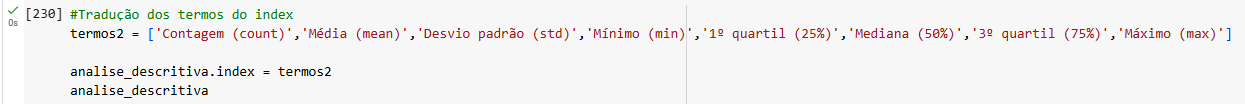

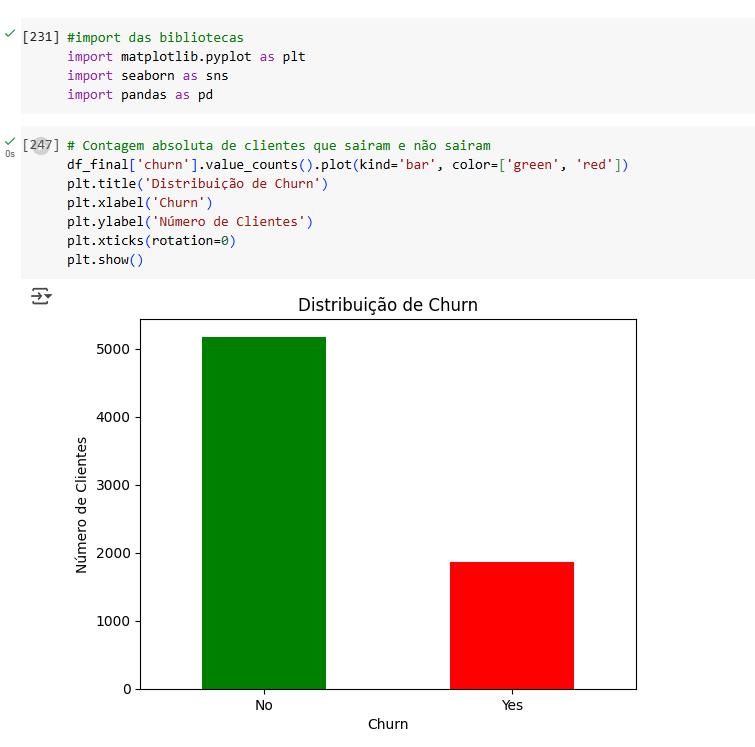

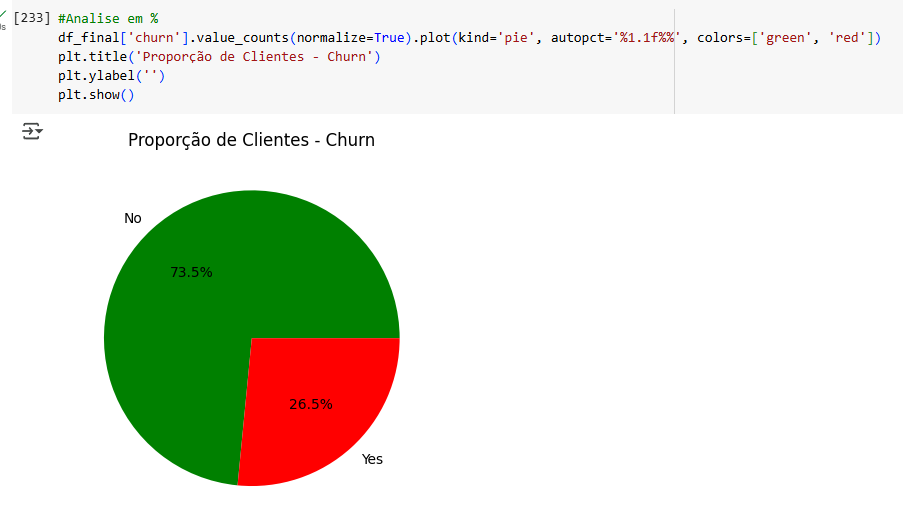

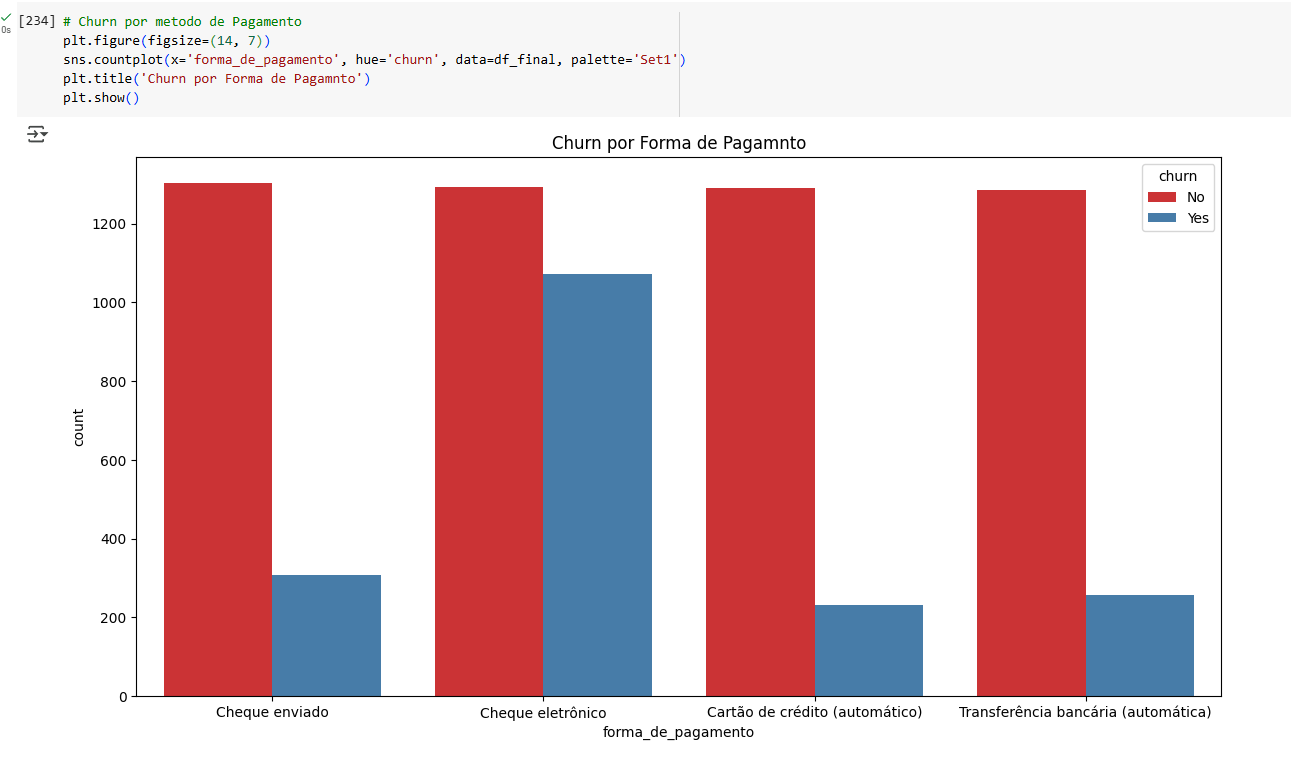

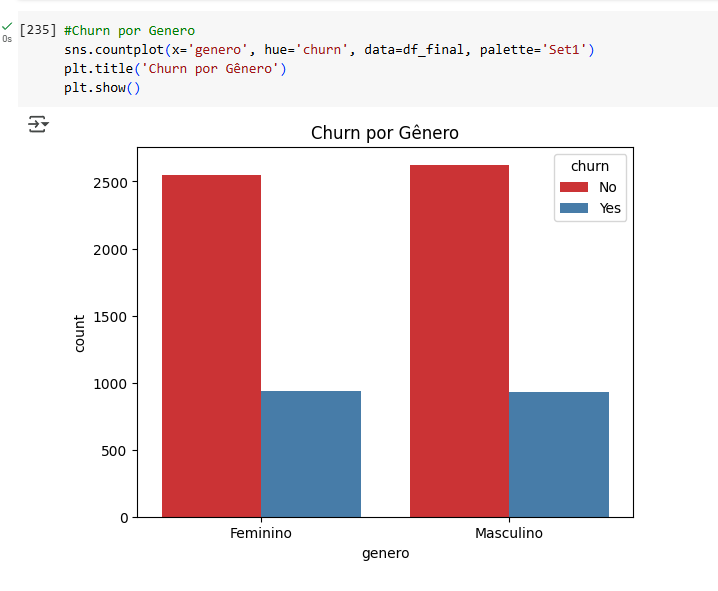

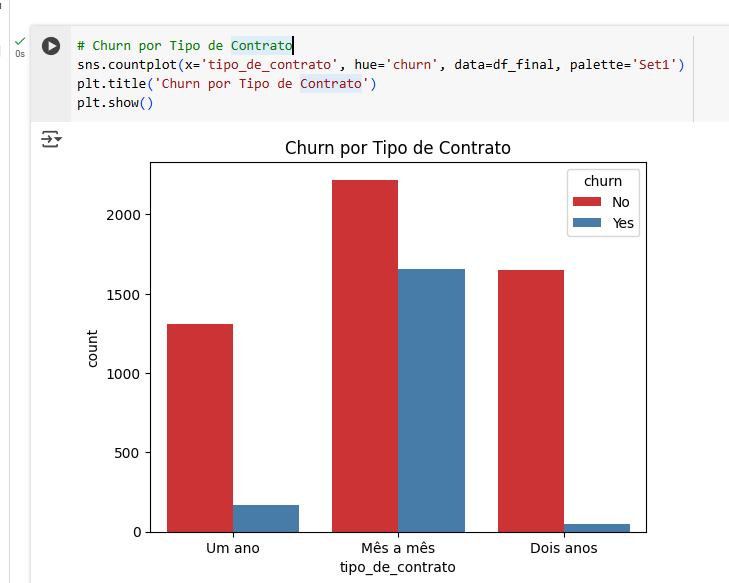

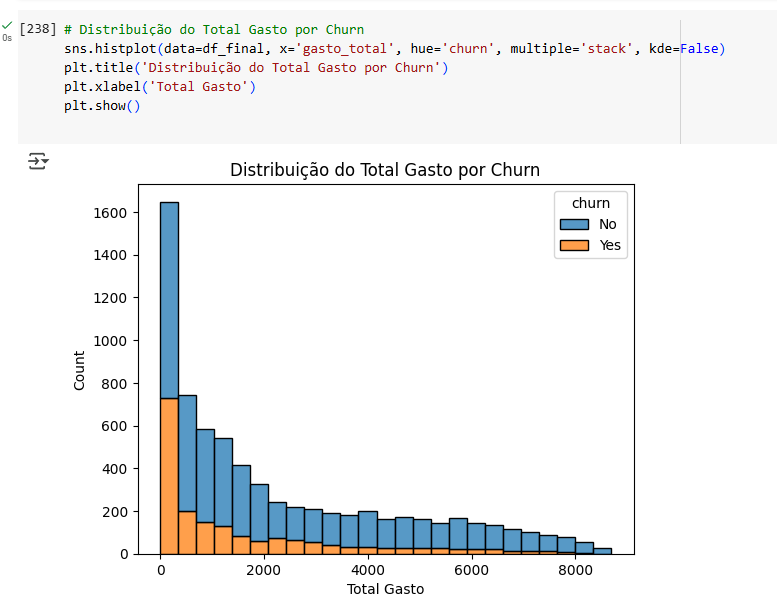

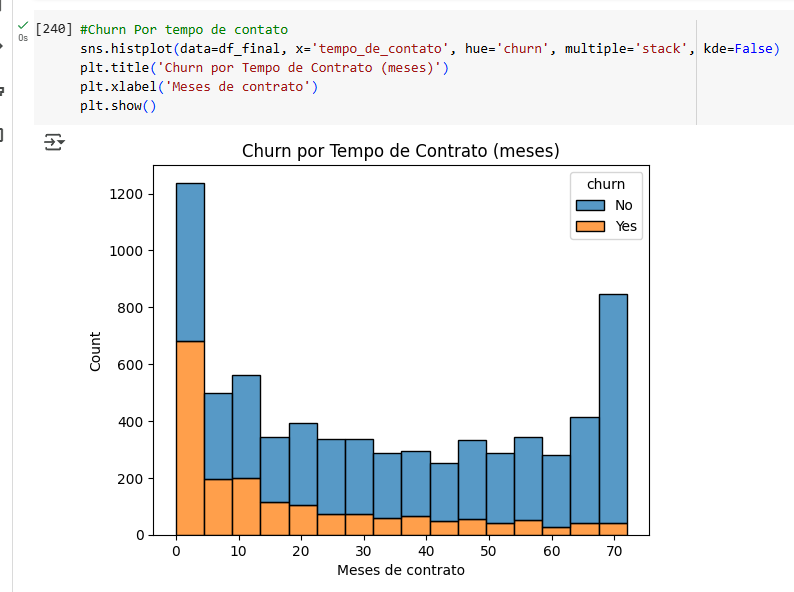

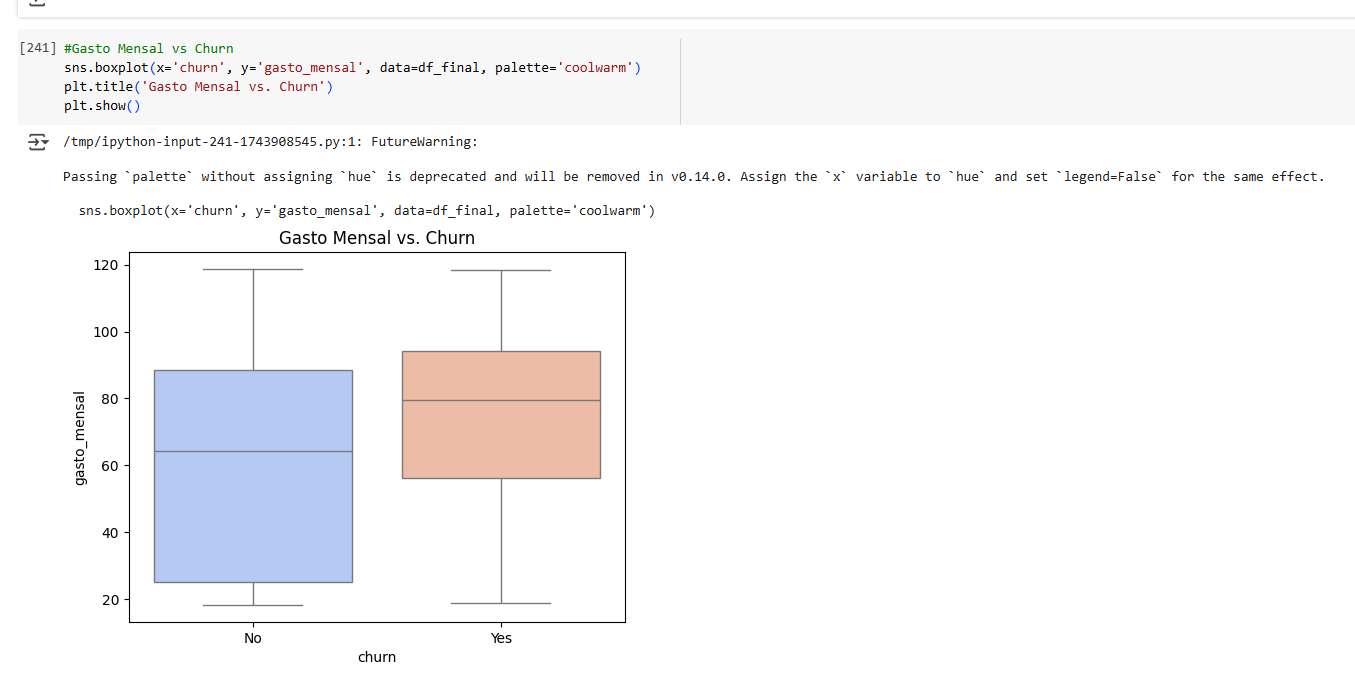

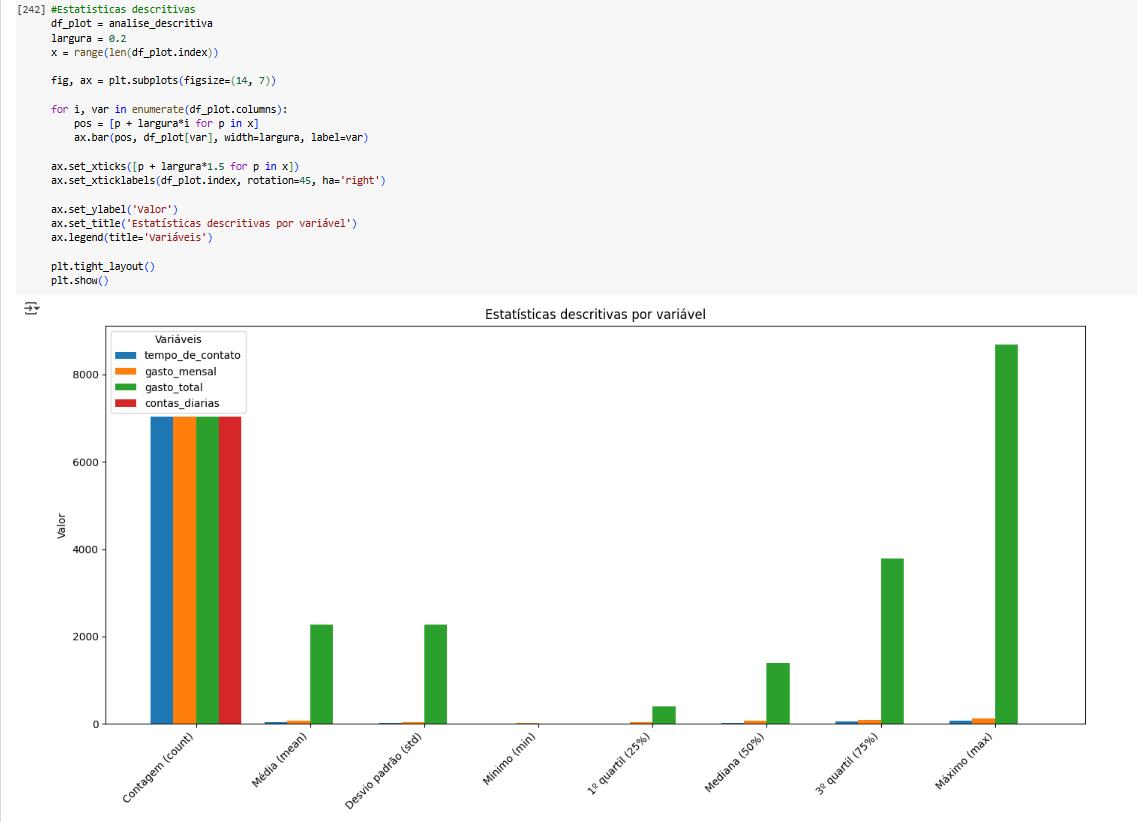

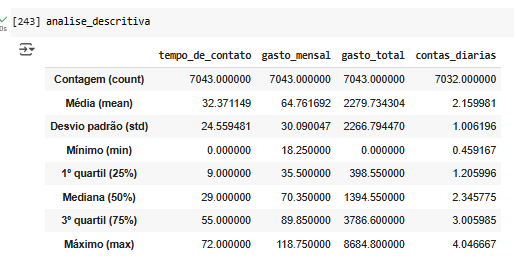

##4. Conclusões e Insights
A análise realizada permitiu identificar fatores relevantes que contribuem para a evasão de clientes (Churn) na base de dados analisada. Abaixo estão os principais achados:

Distribuição de Churn:
Aproximadamente 26,5% dos clientes deixaram a empresa, enquanto 73,5% permaneceram. Esse é um índice de evasão considerável que merece atenção.

Forma de Pagamento:
Clientes que utilizam cheque eletrônico têm uma taxa de evasão significativamente maior comparada às demais formas de pagamento.
Clientes que utilizam cartão de crédito automático ou transferência bancária automática tendem a permanecer mais tempo.

Gênero:
O gênero não apresenta diferença significativa entre os grupos que saíram e os que permaneceram. A evasão é distribuída de forma equilibrada entre homens e mulheres.

Tipo de Contrato:
Clientes com contratos mensais têm uma taxa de evasão muito mais alta.
Já contratos de um ano ou dois anos mostram uma tendência maior de fidelização.

Tempo de Contrato:
A maioria dos cancelamentos ocorre nos primeiros meses de contrato. Clientes com contratos mais longos tendem a permanecer.

Gasto Total e Gasto Mensal:
Clientes que saíram da empresa, em média, apresentam gastos mensais ligeiramente mais elevados.
O gasto total entre clientes que saíram e os que permaneceram também mostra diferença significativa, sugerindo que clientes insatisfeitos podem abandonar a empresa mesmo após longo tempo de uso.



##5. Recomendações

Oferecer benefícios para contratos mais longos:
Criar campanhas de fidelização que incentivem os clientes a migrarem para contratos anuais ou bienais, oferecendo descontos ou benefícios exclusivos.

Aprimorar a experiência de novos clientes:
Desenvolver ações de retenção específicas para os primeiros meses de contrato, quando a taxa de evasão é mais alta.

Melhorar as condições do pagamento via cheque eletrônico:
Avaliar a experiência dos clientes que utilizam esse método e considerar melhorias ou incentivos para que migrem para métodos automáticos, como cartão ou débito em conta.

Monitorar clientes com gastos elevados:
Criar um programa de acompanhamento personalizado para clientes com alto gasto mensal, oferecendo suporte exclusivo e promoções direcionadas.

Implementar pesquisas de satisfação contínuas:
Aplicar questionários rápidos de satisfação ao longo da jornada do cliente para identificar pontos de insatisfação antes que ele cancele o serviço.